In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Gaussiano.csv',encoding='UTF-8',header=0,delimiter=';')

In [3]:
def prior_distribution(mu, sigma):
    if 3 <= mu <= 5 and 0.5 <= sigma <= 3.5:
        return 1
    else:
        return 0

In [4]:
def likelihood(x, mu, sigma):
    N = len(x)
    exponent = -0.5 * np.sum(np.square((x - mu) / sigma))
    normalization = (2 * np.pi * np.square(sigma))**(-N / 2)
    return normalization * np.exp(exponent)

In [5]:
def posterior_distribution(x, mu, sigma):
    prior = prior_distribution(mu, sigma)
    likelihood_value = likelihood(x, mu, sigma)
    return np.log(prior * likelihood_value)

In [6]:
def metropolis_hastings(x, initial_mu, initial_sigma, num_samples):
    samples = []
    current_mu = initial_mu
    current_sigma = initial_sigma

    for _ in range(num_samples):
        # Generate proposal values
        proposal_mu = np.random.normal(current_mu, 0.1)
        proposal_sigma = np.random.normal(current_sigma, 0.1)

        # Calculate acceptance ratio
        acceptance_ratio = np.exp(
            posterior_distribution(x, proposal_mu, proposal_sigma) -
            posterior_distribution(x, current_mu, current_sigma))

        # Accept or reject the proposal
        if acceptance_ratio >= 1 or np.random.uniform() < acceptance_ratio:
            current_mu = proposal_mu
            current_sigma = proposal_sigma

        # Save the current parameter values
        samples.append((current_mu, current_sigma))

    return samples


In [7]:
# Estimate the best values of the model parameters
num_samples = 20000
samples = metropolis_hastings(data['x'], 4, 1, num_samples)
best_mu, best_sigma = np.mean(samples, axis=0)

# Calculate the errors of the parameters within a 68% confidence interval
quantiles = np.quantile(samples, [0.16, 0.84], axis=0)
error_mu = (quantiles[1][0] - quantiles[0][0]) / 2
error_sigma = (quantiles[1][1] - quantiles[0][1]) / 2

In [8]:
print("Best value of mu:", best_mu)
print("Best value of sigma:", best_sigma)
print("Error of mu within a 68% confidence interval:", error_mu)
print("Error of sigma within a 68% confidence interval:", error_sigma)

Best value of mu: 4.024055556008681
Best value of sigma: 1.84208021831242
Error of mu within a 68% confidence interval: 0.1843500984244124
Error of sigma within a 68% confidence interval: 0.12942580067344533


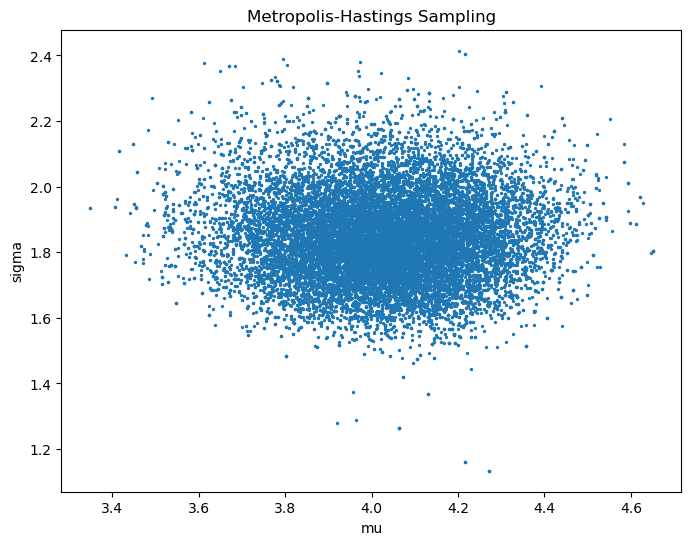

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*samples), s=2)
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Metropolis-Hastings Sampling')
plt.show()